In [57]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
import numpy as np
import random
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import preprocessing as pre
from activations import Sigmoid, Softmax
from mlp import MLP
from layer import Layer
from loss import CCE

### Preprocessing ###

In [25]:
digits = load_digits()
data = (digits.data.astype("float32"), digits.target)

# constants
BATCH_SIZE = 10

In [124]:
x = pre.normalize(data[0], 0, 1)
y = pre.encode_targets(data[1])

model = MLP(64, [8,12,10])
cce = CCE()
losses = []
#generate shuffled batches
for i in range(1000):
    shuffled = pre.batch_generator(x, y, BATCH_SIZE)
    for data_batch, target_batch in shuffled:
        out = model.forward(data_batch)
        loss = cce(out, target_batch)
        grad = cce.backwards(out, target_batch)
        model.backwards(grad)
        model.update(0.02)
        losses.append(np.mean((loss), axis = 0))

Layer(num_units=8, input_size=64, activation=Sigmoid)
Layer(num_units=12, input_size=8, activation=Sigmoid)
Layer(num_units=10, input_size=12, activation=Softmax)


In [126]:
losses[-1]

0.0007791856012366033

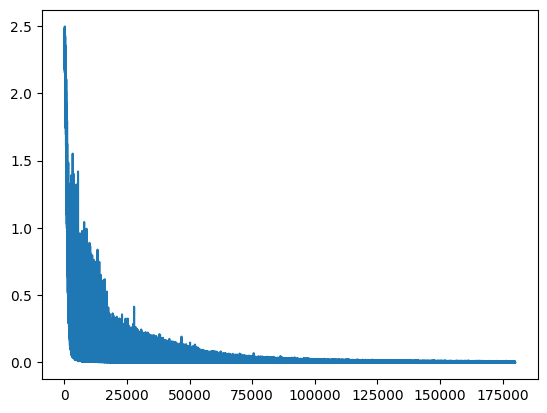

In [127]:
plt.plot(losses)

### Visualizations ###

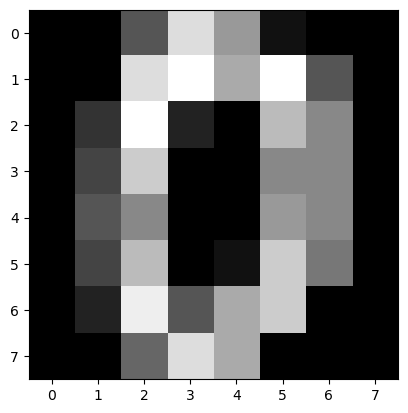

In [23]:
plt.imshow(x[0].reshape(8,8), cmap="gray")